In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 50

<h2> MLP + ReLU Without Batch Normalization & Dropout (With 2 hidden layers) </h2>

In [33]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal
from keras.layers import Dense, Activation 
from keras.layers import Dropout

model_one = Sequential()

model_one.add(Dense(456, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

model_one.add(Dense(248, activation='relu', kernel_initializer=he_normal(seed=None)) )

model_one.add(Dense(output_dim, activation='softmax'))

model_one.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 456)               357960    
_________________________________________________________________
dense_28 (Dense)             (None, 248)               113336    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                2490      
Total params: 473,786
Trainable params: 473,786
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_one.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_one.fit(X_train, Y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.2251 - acc: 0.9334 - val_loss: 0.1123 - val_acc: 0.9671
Epoch 2/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.0824 - acc: 0.9746 - val_loss: 0.0852 - val_acc: 0.9715
Epoch 3/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.0531 - acc: 0.9833 - val_loss: 0.0693 - val_acc: 0.9772
Epoch 4/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.0375 - acc: 0.9882 - val_loss: 0.0725 - val_acc: 0.9790
Epoch 5/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.0267 - acc: 0.9914 - val_loss: 0.0644 - val_acc: 0.9816
Epoch 6/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.0203 - acc: 0.9936 - val_loss: 0.0732 - val_acc: 0.9781
Epoch 7/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.0158 - acc: 0.9948 - val_loss: 0.0885 - val_acc

Test score: 0.11229222209781944
Test accuracy: 0.9818


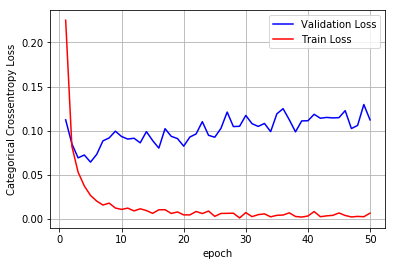

In [35]:
%matplotlib inline
score = model_one.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + ReLU + Batch Normalization + Dropout (With 2 hidden layers) </h2>

In [36]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Activation 
from keras.layers import Dropout

model = Sequential()

model.add(Dense(456, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(248, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 456)               357960    
_________________________________________________________________
batch_normalization_11 (Batc (None, 456)               1824      
_________________________________________________________________
dropout_11 (Dropout)         (None, 456)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 248)               113336    
_________________________________________________________________
batch_normalization_12 (Batc (None, 248)               992       
_________________________________________________________________
dropout_12 (Dropout)         (None, 248)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)              

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.4123 - acc: 0.8744 - val_loss: 0.1364 - val_acc: 0.9566
Epoch 2/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.1955 - acc: 0.9409 - val_loss: 0.0995 - val_acc: 0.9686
Epoch 3/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.1572 - acc: 0.9525 - val_loss: 0.0922 - val_acc: 0.9713
Epoch 4/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.1341 - acc: 0.9578 - val_loss: 0.0793 - val_acc: 0.9733
Epoch 5/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.1182 - acc: 0.9633 - val_loss: 0.0757 - val_acc: 0.9748
Epoch 6/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.1051 - acc: 0.9670 - val_loss: 0.0657 - val_acc: 0.9801
Epoch 7/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.0988 - acc: 0.9689 - val_loss: 0.0694 - val_ac

Test score: 0.05319240672139513
Test accuracy: 0.9863


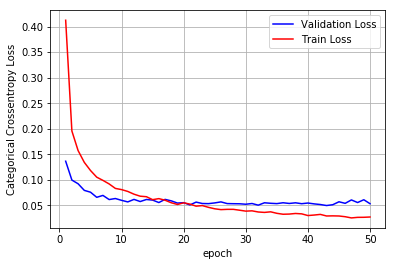

In [38]:
%matplotlib inline
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


<h2> MLP + ReLU without Batch Normalization & Dropout (With 3 hidden layers) </h2>

In [39]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Activation 
from keras.layers import Dropout

model_three = Sequential()

model_three.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

model_three.add(Dense(224, activation='relu', kernel_initializer=he_normal(seed=None)) )

model_three.add(Dense(132, activation='relu', kernel_initializer=he_normal(seed=None)) )


model_three.add(Dense(output_dim, activation='softmax'))

model_three.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 368)               288880    
_________________________________________________________________
dense_34 (Dense)             (None, 224)               82656     
_________________________________________________________________
dense_35 (Dense)             (None, 132)               29700     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1330      
Total params: 402,566
Trainable params: 402,566
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_three.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_three.fit(X_train, Y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.2326 - acc: 0.9320 - val_loss: 0.1069 - val_acc: 0.9681
Epoch 2/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.0864 - acc: 0.9732 - val_loss: 0.0738 - val_acc: 0.9755
Epoch 3/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.0566 - acc: 0.9827 - val_loss: 0.0828 - val_acc: 0.9742
Epoch 4/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.0421 - acc: 0.9869 - val_loss: 0.0631 - val_acc: 0.9802
Epoch 5/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.0312 - acc: 0.9900 - val_loss: 0.0689 - val_acc: 0.9806
Epoch 6/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.0253 - acc: 0.9916 - val_loss: 0.0798 - val_acc: 0.9761
Epoch 7/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.0197 - acc: 0.9935 - val_loss: 0.0929 - val_acc

Test score: 0.1135252954211466
Test accuracy: 0.9817


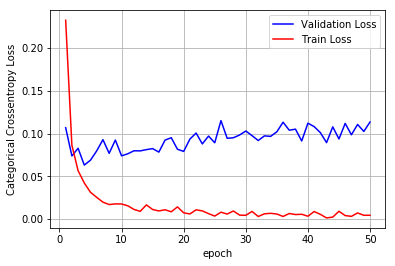

In [41]:
%matplotlib inline
score = model_three.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + ReLU + Batch Normalization + Dropout (With 3 hidden layers) </h2>

In [21]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Activation 
from keras.layers import Dropout

model_two = Sequential()

model_two.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_two.add(BatchNormalization())
model_two.add(Dropout(0.5))

model_two.add(Dense(224, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_two.add(BatchNormalization())
model_two.add(Dropout(0.5))

model_two.add(Dense(132, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_two.add(BatchNormalization())
model_two.add(Dropout(0.5))

model_two.add(Dense(output_dim, activation='softmax'))

model_two.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 368)               288880    
_________________________________________________________________
batch_normalization_3 (Batch (None, 368)               1472      
_________________________________________________________________
dropout_3 (Dropout)          (None, 368)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 224)               82656     
_________________________________________________________________
batch_normalization_4 (Batch (None, 224)               896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 224)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 132)              

In [22]:
!pip install plotly --upgrade

     |████████████████████████████████| 7.2MB 28kB/s 
  Found existing installation: plotly 4.1.1
    Uninstalling plotly-4.1.1:
      Successfully uninstalled plotly-4.1.1


In [23]:
model_two.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_two.fit(X_train, Y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.8143 - acc: 0.7470 - val_loss: 0.2372 - val_acc: 0.9265
Epoch 2/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.3755 - acc: 0.8894 - val_loss: 0.1737 - val_acc: 0.9462
Epoch 3/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.2974 - acc: 0.9131 - val_loss: 0.1423 - val_acc: 0.9543
Epoch 4/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.2486 - acc: 0.9262 - val_loss: 0.1271 - val_acc: 0.9601
Epoch 5/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.2201 - acc: 0.9352 - val_loss: 0.1255 - val_acc: 0.9631
Epoch 6/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.1961 - acc: 0.9415 - val_loss: 0.1051 - val_acc: 0.9692
Epoch 7/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1852 - acc: 0.9476 - val_loss: 0.0980 - val_a

Test score: 0.06771488659109018
Test accuracy: 0.9828


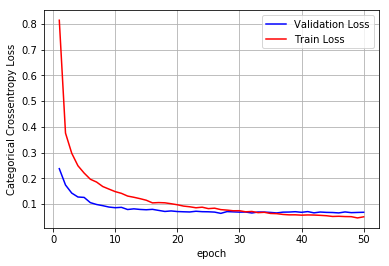

In [24]:
%matplotlib inline
score = model_two.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + ReLU without Batch Normalization & Dropout (With 5 hidden layers) </h2>

In [42]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Activation 
from keras.layers import Dropout

model_four = Sequential()

model_four.add(Dense(424, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

model_four.add(Dense(314, activation='relu', kernel_initializer=he_normal(seed=None)) )

model_four.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)) )

model_four.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)) )

model_four.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)) )

model_four.add(Dense(output_dim, activation='softmax'))

model_four.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 424)               332840    
_________________________________________________________________
dense_38 (Dense)             (None, 314)               133450    
_________________________________________________________________
dense_39 (Dense)             (None, 256)               80640     
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 10)                650       
Total params: 588,732
Trainable params: 588,732
Non-trainable params: 0
_______________________________________________

In [43]:
model_four.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_four.fit(X_train, Y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.2399 - acc: 0.9263 - val_loss: 0.1095 - val_acc: 0.9658
Epoch 2/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.0928 - acc: 0.9719 - val_loss: 0.0892 - val_acc: 0.9730
Epoch 3/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.0645 - acc: 0.9794 - val_loss: 0.1092 - val_acc: 0.9668
Epoch 4/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.0508 - acc: 0.9838 - val_loss: 0.0714 - val_acc: 0.9783
Epoch 5/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.0398 - acc: 0.9872 - val_loss: 0.0771 - val_acc: 0.9785
Epoch 6/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.0334 - acc: 0.9891 - val_loss: 0.0899 - val_acc: 0.9765
Epoch 7/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.0255 - acc: 0.9920 - val_loss: 0.0988 - val_acc

Test score: 0.12247530582656879
Test accuracy: 0.9828


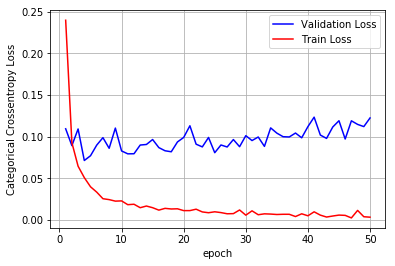

In [44]:
%matplotlib inline
score = model_four.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + ReLU + Batch Normalization + Dropout (With 5 hidden layers) </h2>

In [45]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Activation 
from keras.layers import Dropout

model_five = Sequential()

model_five.add(Dense(424, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_five.add(BatchNormalization())
model_five.add(Dropout(0.5))

model_five.add(Dense(314, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_five.add(BatchNormalization())
model_five.add(Dropout(0.5))

model_five.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_five.add(BatchNormalization())
model_five.add(Dropout(0.5))

model_five.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_five.add(BatchNormalization())
model_five.add(Dropout(0.5))

model_five.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_five.add(BatchNormalization())
model_five.add(Dropout(0.5))

model_five.add(Dense(output_dim, activation='softmax'))

model_five.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 424)               332840    
_________________________________________________________________
batch_normalization_13 (Batc (None, 424)               1696      
_________________________________________________________________
dropout_13 (Dropout)         (None, 424)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 314)               133450    
_________________________________________________________________
batch_normalization_14 (Batc (None, 314)               1256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 314)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)             

In [46]:
model_five.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_five.fit(X_train, Y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 202us/step - loss: 1.1809 - acc: 0.6278 - val_loss: 0.2667 - val_acc: 0.9225
Epoch 2/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.4186 - acc: 0.8829 - val_loss: 0.1771 - val_acc: 0.9510
Epoch 3/50
60000/60000 [==============================] - 9s 157us/step - loss: 0.3061 - acc: 0.9172 - val_loss: 0.1431 - val_acc: 0.9605
Epoch 4/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.2487 - acc: 0.9347 - val_loss: 0.1290 - val_acc: 0.9643
Epoch 5/50
60000/60000 [==============================] - 9s 154us/step - loss: 0.2208 - acc: 0.9412 - val_loss: 0.1176 - val_acc: 0.9693
Epoch 6/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.1970 - acc: 0.9487 - val_loss: 0.1111 - val_acc: 0.9720
Epoch 7/50
60000/60000 [==============================] - 9s 155us/step - loss: 0.1806 - acc: 0.9539 - val_loss: 0.1009 -

Test score: 0.06441039258484961
Test accuracy: 0.9853


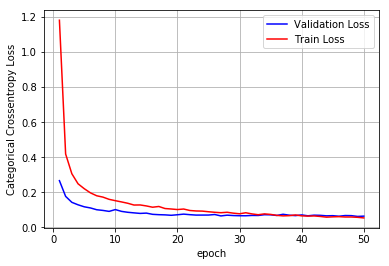

In [47]:
%matplotlib inline
score = model_five.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [49]:
# Please write down few lines about what you observed from this assignment.
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = [ "Model","Number of Hidden Layers", "Train Accuracy", "Test Accuracy"]
x.add_row(["MLP + ReLU Without Batch Normalization & Dropout", "2", "0.9980", "0.9818"])
x.add_row(["MLP + ReLU With Batch Normalization & Dropout", "2", "0.9907", "0.9863"])
x.add_row(["MLP + ReLU Without Batch Normalization & Dropout", "3", "0.9988", "0.9817"])
x.add_row(["MLP + ReLU With Batch Normalization & Dropout", "3", "0.9846", "0.9828"])
x.add_row(["MLP + ReLU Without Batch Normalization & Dropout", "5", "0.9991", "0.9828"])
x.add_row(["MLP + ReLU With Batch Normalization & Dropout", "5", "0.9861", "0.9853"])
print(x)

+--------------------------------------------------+-------------------------+----------------+---------------+
|                      Model                       | Number of Hidden Layers | Train Accuracy | Test Accuracy |
+--------------------------------------------------+-------------------------+----------------+---------------+
| MLP + ReLU Without Batch Normalization & Dropout |            2            |     0.9980     |     0.9818    |
|  MLP + ReLU With Batch Normalization & Dropout   |            2            |     0.9907     |     0.9863    |
| MLP + ReLU Without Batch Normalization & Dropout |            3            |     0.9988     |     0.9817    |
|  MLP + ReLU With Batch Normalization & Dropout   |            3            |     0.9846     |     0.9828    |
| MLP + ReLU Without Batch Normalization & Dropout |            5            |     0.9991     |     0.9828    |
|  MLP + ReLU With Batch Normalization & Dropout   |            5            |     0.9861     |     0.98